In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

In [28]:
spray = pd.read_csv('./data/spray.csv')
spray.head(1)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163


In [29]:
#spray shape
spray.shape

(14835, 4)

In [30]:
#null values
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [31]:
#info and column types
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [32]:
#basic stats of variables
spray.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,14835.0,41.904828,0.104381,41.713925,41.785001,41.940075,41.980978,42.395983
Longitude,14835.0,-87.736690,0.067292,-88.096468,-87.794225,-87.727853,-87.694108,-87.586727


In [33]:
#identifying correlated data
spray.corr()

,Latitude,Longitude
Latitude,1.00000,-0.76779
Longitude,-0.76779,1.00000


In [34]:
#Converting Date column to date data type
spray['Date'] = pd.to_datetime(spray['Date'], infer_datetime_format=True)

In [35]:
spray.dtypes

Date         datetime64[ns]
Time                 object
Latitude            float64
Longitude           float64
dtype: object

In [36]:
spray.to_csv('EDA_SPRAY.csv')

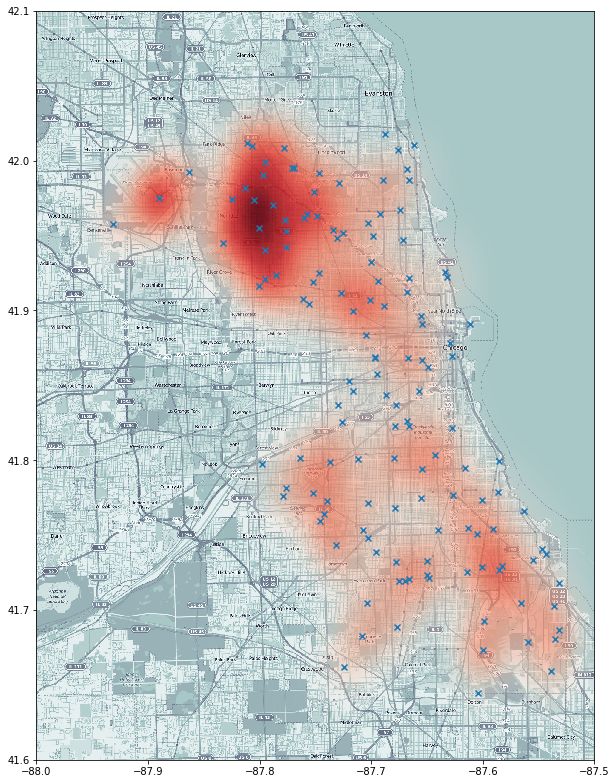

In [10]:
#code developed by Vasco as part of discussion forum on Kaggle
#https://www.kaggle.com/vascovv/west-nile-heatmap/code

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("./data/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('./data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

sigthings = traps[traps['WnvPresent'] > 0]
sigthings = sigthings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.02)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 200), np.linspace(41.6, 42.1, 200))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(200,200))
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('bone'), 
           extent=lon_lat_box, 
           aspect=aspect)
plt.imshow(zv, 
           origin='lower', 
           cmap=alpha_cm, 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

plt.savefig('heatmap.png')

In [13]:
X[0:5,:]

array([[-87.531635,  41.686398],
       [-87.599862,  41.673408],
       [-87.800991,  41.95469 ],
       [-87.777921,  42.008314],
       [-87.824812,  41.974089]])